In [6]:
### Author: Leonie Küchenhoff
### Date: October 2022
### Purpose of script: Script to check list of variats in more detail.
###             (Are there any gRNA Sequence similarities in proximity?)

In [7]:
import numpy as np
import pandas as pd
import os
from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
from config import outdir, tissue_specdir, reference_seq

In [8]:
# sample names
names = ['028_pbs_R', '029_pbs_R', '032_pbs_R','033_nrch_R', '030_nrch_R', '036_nrch_R', 
            '011_pbs', '012_nrch', '013_nrch', '014_nrch', '279_spry', '321_pbs', '333_pbs', '450_spry', '283_spry']
# treatment in same order as sample names
base_editor = ['pbs', 'pbs', 'pbs', '8e-NRCH', '8e-NRCH', '8e-NRCH',
            'pbs', '8e-NRCH', '8e-NRCH','8e-NRCH', 'max-SpRY', 'pbs', 'pbs', 'max-SpRY', 'max-SpRY']
mutation = ['r636q' if i[-1] == 'R' else 'p635l' for i in names]
condition = [i+'_'+j for i,j in zip(base_editor, mutation)]
helper_scripts = str(os.getcwd())
#base directory
basedir = tissue_specdir
outdir = str(outdir + '/variant_surrounding/')
print('This base directory will be used:\n', basedir)    
os.chdir(basedir)

#path to refernce sequence
ref_seq = reference_seq

#gRNA + PAM sequence 
grna_spry = 'GAACGTAGCCGCTCTGGACCANRN'
grna_nrch = 'GAACGTAGCCGCTCTGGACCANRCH'
grnaR_nrch = 'GCACAGTCTCGAAGTCCAATGNRCH'


This base directory will be used:
 /g/steinmetz/project/leonie_crispr/03_data/02_rnaseq/snakemake/tissue_spec_vars


In [9]:
def read_reference_data(path_ref):
    '''
    function to read in reference sequence
    '''
    reference = SeqIO.to_dict(SeqIO.parse(path_ref, 'fasta'))
    return reference

In [10]:
# read in reference sequence
reference  = read_reference_data(ref_seq)

In [11]:
# Read in list of tissue specific variants to find location of variants
heart_spec_dict = {}
for i in names:
    heart_spec_dict[i] = pd.read_csv(f'HC_PL_ST_heart_{i}.txt', delimiter='\t')
liver_spec_dict = {}
for i in names:
    liver_spec_dict[i] = pd.read_csv(f'HC_PL_ST_liver_{i}.txt', delimiter='\t')

In [12]:
chromosomes = ['chr1',
                'chr2',
                'chr3',
                'chr4',
                'chr5',
                'chr6',
                'chr7',
                'chr8',
                'chr9',
                'chr10',
                'chr11',
                'chr12',
                'chr13',
                'chr14',
                'chr15',
                'chr16',
                'chr17',
                'chr18',
                'chr19',
                'chrX',
                'chrY']

In [13]:
def save_refseq(position_dict, tissue, names):
    '''
    function to interate through positions of varaints and save reference sequence +/- 30 bases in table
    '''
    seq_dict = {}
    for count, name in enumerate(names):
        if name[-1] == 'R':
            gRNA = grnaR_nrch
        else:
            if condition[count][0] == '8':
                gRNA = grna_nrch
            else:
                gRNA = grna_spry
        df_in = position_dict[name]

        seq_list = []
        for chr in chromosomes:
            seq = reference[chr].upper()
            positions = df_in[df_in['chr'] == chr]['pos'].to_list()
            for i in positions:
                seq_pos = seq[i-30: i + 30]
                seq_list.append(str(seq_pos.seq))
        seq_dict[name] = seq_list
        df = pd.DataFrame({'gRNA':gRNA, 'genome_dna':seq_dict[name], 'chr':df_in['chr'], 'pos':df_in['pos'], 'ref':df_in['ref'], 'alt':df_in['alt'], 'normed_h':df_in['normed_h'], 'normed_l':df_in['normed_l']})

        if condition[count][0] == "p":
            df2 = pd.DataFrame({'gRNA':grna_nrch, 'genome_dna':seq_dict[name], 'chr':df_in['chr'], 'pos':df_in['pos'], 'ref':df_in['ref'], 'alt':df_in['alt'], 'normed_h':df_in['normed_h'], 'normed_l':df_in['normed_l']})
            df = pd.concat([df2,df])

        df.to_csv(f'{tissue}_genomic_surrounding_sample_{name}.txt', sep = '\t', index = False)

In [14]:
save_refseq(heart_spec_dict, 'heart', names)
save_refseq(liver_spec_dict, 'liver', names)

In [23]:
# costum perl script to align PAM sequence & gRNA to region around variant and output number of mismatches to best match in region
#for i in names:
#    os.system(f'''
#    perl {helper_scripts}/semi_global_alignment.pl -in heart_genomic_surrounding_sample_{i}.txt -o heart_genomic_surrounding_sample_{i}_analysis.txt &&
#    perl {helper_scripts}/semi_global_alignment.pl -in liver_genomic_surrounding_sample_{i}.txt -o liver_genomic_surrounding_sample_{i}_analysis.txt &&
#    ''')

sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file
sh: -c: line 4: syntax error: unexpected end of file


In [15]:
# read in results from perl script

analysed_heart = pd.DataFrame()
for count,i in enumerate(names):
    analysed_sample = pd.read_csv(f'heart_genomic_surrounding_sample_{i}_analysis.txt',
                                        delimiter = '\t')
    analysed_sample['sample'] = i
    analysed_sample['tissue'] ='heart'
    analysed_sample['condition'] = condition[count]
    analysed_heart = pd.concat([analysed_heart, analysed_sample], ignore_index=True)

In [16]:
# exclude target-area
analysed_heart = analysed_heart[~(analysed_heart['pos']>=53843223)& (analysed_heart['pos']<=53843268) & (analysed_heart['chr']>='chr19')]

In [17]:
mismatch_plot = analysed_heart[['mismtaches', 'condition', 'tissue']]
mismatch_plot.to_csv(f'{outdir}/mismatch_plot.txt')

In [18]:
# color & plot settings
colors = [sns.color_palette('colorblind')[3],
          sns.color_palette('colorblind')[2],
          sns.color_palette('colorblind')[1],
          sns.color_palette('colorblind')[0],
          'white',
          sns.color_palette('colorblind')[4],
          sns.color_palette('colorblind')[5],
          sns.color_palette('colorblind')[6],
          sns.color_palette('colorblind')[7],
          sns.color_palette('colorblind')[8]
          ]
costum_palette = sns.color_palette(colors)
plt.rcParams.update({'font.size':18, 'text.usetex': False,
"svg.fonttype": 'none'})

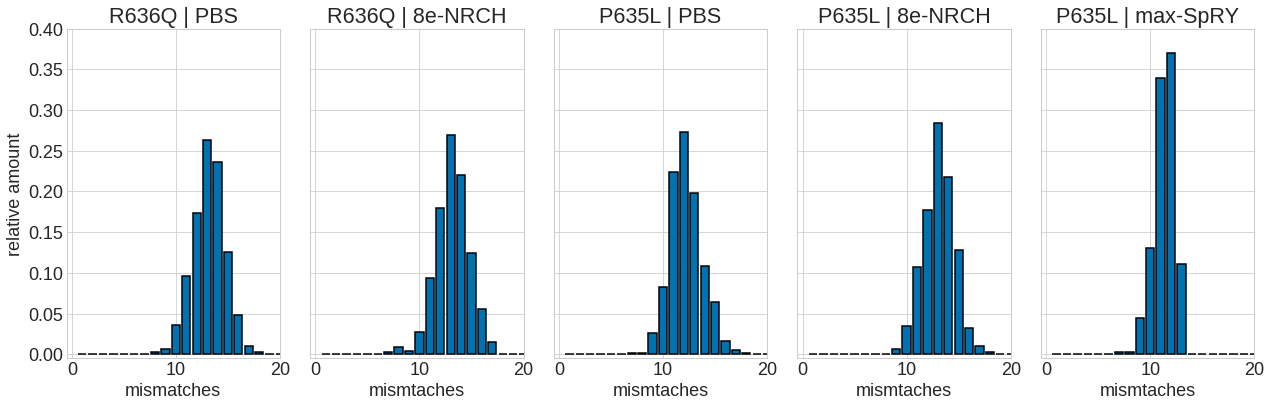

In [20]:
fig, ax = plt.subplots(1,5, figsize = (18,6), sharey = True, sharex = True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
for count,i in enumerate(['pbs_r636q','8e-NRCH_r636q', 'pbs_p635l','8e-NRCH_p635l','max-SpRY_p635l']):
    sns.histplot(data = mismatch_plot[mismatch_plot['condition'] == i], x = 'mismtaches', 
                    stat = 'probability', ax = ax[count], binwidth = 1, binrange = (0.5,20.5), common_norm =False, 
                    palette = [costum_palette[j] for j in [0]],edgecolor = 'black', linewidth = 1.5, shrink = 0.8, alpha=1)
    ax[count].set_title(f'{i}')

ax[0].set_xlabel('mismatches')
ax[0].set_xlim(-0.50,20)
ax[0].set_ylim(-0.005,0.4)
ax[0].set_ylabel('relative amount')
ax[0].set_title('R636Q | PBS')
ax[1].set_title('R636Q | 8e-NRCH')
ax[2].set_title('P635L | PBS')
ax[3].set_title('P635L | 8e-NRCH')
ax[4].set_title('P635L | max-SpRY')
fig.tight_layout()
plt.show()
fig.savefig(f'{outdir}/tissue_spec_mismatches.pdf', bbox_inches = 'tight')
fig.savefig(f'{outdir}/tissue_spec_mismatches.svg', bbox_inches = 'tight')

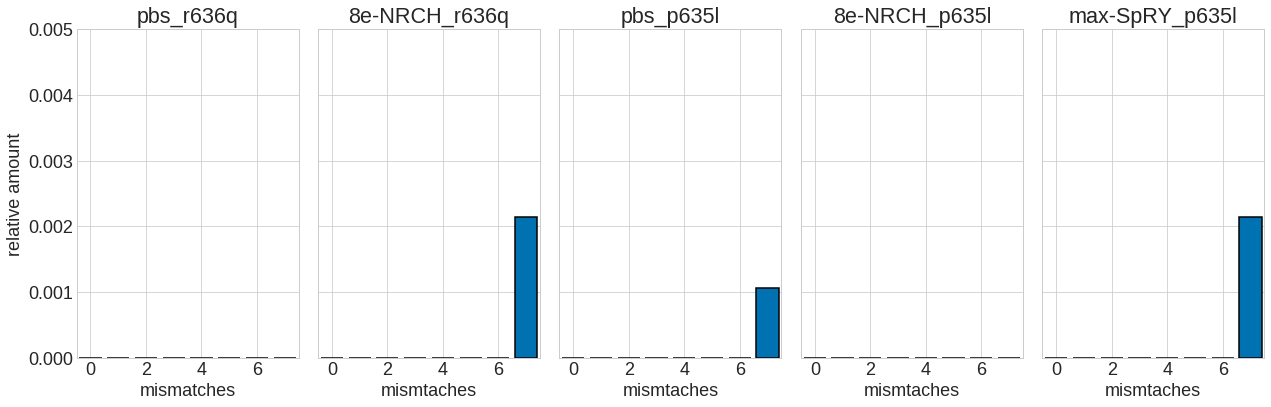

In [21]:
# zoom in on plot

fig, ax = plt.subplots(1,5, figsize = (18,6), sharey = True, sharex = True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

for count,i in enumerate(['pbs_r636q','8e-NRCH_r636q', 'pbs_p635l','8e-NRCH_p635l','max-SpRY_p635l']):
    sns.histplot(data = mismatch_plot[mismatch_plot['condition'] == i], x = 'mismtaches', 
                    stat = 'probability', ax = ax[count], binwidth = 1, binrange = (-0.5,20.5), common_norm =False, 
                    palette = [costum_palette[j] for j in [0]],edgecolor = 'black', linewidth = 1.5, shrink = 0.8, alpha=1)
    ax[count].set_title(f'{i}')

ax[0].set_xlabel('mismatches')
ax[0].set_xlim(-0.5,7.5)
ax[0].set_ylim(0,0.005)
ax[0].set_ylabel('relative amount')

fig.tight_layout()
plt.show()
fig.savefig(f'{outdir}/tissue_spec_mismatches_zoom.pdf', bbox_inches = 'tight')
fig.savefig(f'{outdir}/tissue_spec_mismatches_zoom.svg', bbox_inches = 'tight')

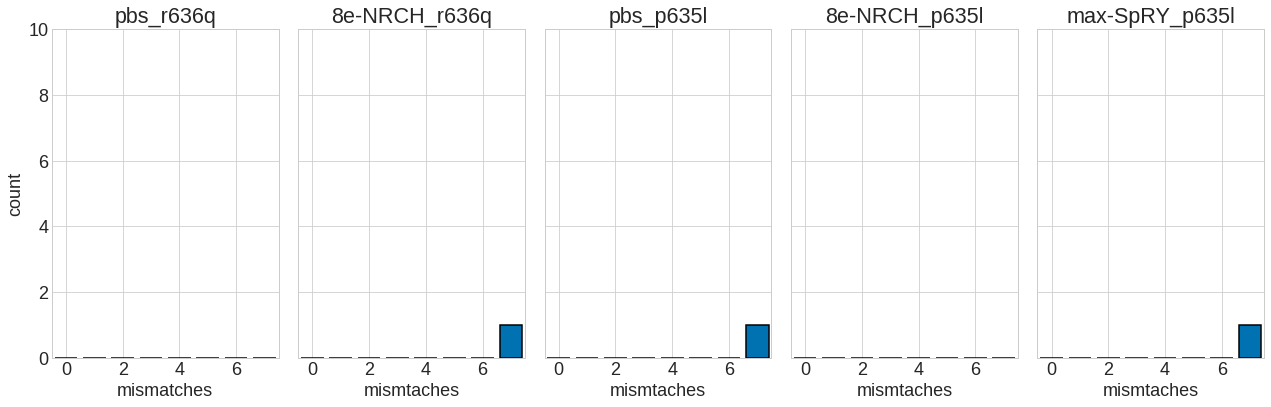

In [22]:
# zoom in on plot but plot absolute values

fig, ax = plt.subplots(1,5, figsize = (18,6), sharey = True, sharex = True)
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

for count,i in enumerate(['pbs_r636q','8e-NRCH_r636q', 'pbs_p635l','8e-NRCH_p635l','max-SpRY_p635l']):
    sns.histplot(data = mismatch_plot[mismatch_plot['condition'] == i], x = 'mismtaches', 
                    ax = ax[count], binwidth = 1, binrange = (-0.5,20.5), common_norm =False, 
                    palette = [costum_palette[j] for j in [0]],edgecolor = 'black', linewidth = 1.5, shrink = 0.8, alpha=1)
    ax[count].set_title(f'{i}')

ax[0].set_xlabel('mismatches')
ax[0].set_xlim(-0.5,7.5)
ax[0].set_ylim(0,10)
ax[0].set_ylabel('count')

fig.tight_layout()
plt.show()
fig.savefig(f'{outdir}/tissue_spec_mismatches_zoom_abs.pdf', bbox_inches = 'tight')
fig.savefig(f'{outdir}/tissue_spec_mismatches_zoom_abs.svg', bbox_inches = 'tight')